In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv('output/output.csv')
cell_df.head() 

,packetId,pii_exist,Unnamed: 2,198.189.255.154,identity,Keep-Alive,cdn.letgo.com,Dalvik,2.1.0,Linux,...,GooglePlay.1,2017-03-13_110806-0700.1,imei.1,deviceData.1,build_display_id.1,arch.1,cpu_abi.1,cpu_abi2.1,af_v2.1,dmp.i2w.io.1
0,"1489429442796,4641b379-0585-41df-a67e-e7b84afe...",0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,"1489429442813,66e32efe-d12a-4e3c-bf9c-60076f81...",0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"1489429442841,844c701a-16b1-4b57-9a6c-d3fe41d5...",0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"1489429442872,a84c5377-bc83-4272-ac88-1cb3fdb5...",0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,"1489429442949,4e4b940b-1bbb-4fa5-b907-d1468d03...",0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
malignant_df = cell_df[cell_df['pii_exist'] == 1]
benign_df = cell_df[cell_df['pii_exist'] == 0]

malignant_df.columns

# axes = benign_df.plot(kind='scatter',x='pii_exist',y='deviceid',color='blue',label='benign')
# malignant_df.plot(kind='scatter',x='pii_exist',y='deviceid',color='red',label='malignant',ax=axes)

Index(['packetId', 'pii_exist', 'Unnamed: 2', '198.189.255.154', 'identity',
       'Keep-Alive', 'cdn.letgo.com', 'Dalvik', '2.1.0 ', 'Linux',
       ...
       'GooglePlay.1', '2017-03-13_110806-0700.1', 'imei.1', 'deviceData.1',
       'build_display_id.1', 'arch.1', 'cpu_abi.1', 'cpu_abi2.1', 'af_v2.1',
       'dmp.i2w.io.1'],
      dtype='object', length=6306)

In [4]:
cell_df.columns
#  = cell_df[:]
feature_df= cell_df.drop(cell_df.columns[:2], axis=1)

#let say it have 100 rows, i am just, picked 9 colums out of it  
#thus 9 colums our of 11

# independent variable
X = np.asarray(feature_df)
#dependent variable
Y=np.asarray(cell_df['pii_exist'])



from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=4)

X_train.shape
X_test.shape

(181, 6304)

In [5]:
from sklearn import svm

classifier = svm.SVC(kernel='linear',gamma='auto',C=1)
classifier.fit(X_train,Y_train)
y_predict = classifier.predict(X_test)

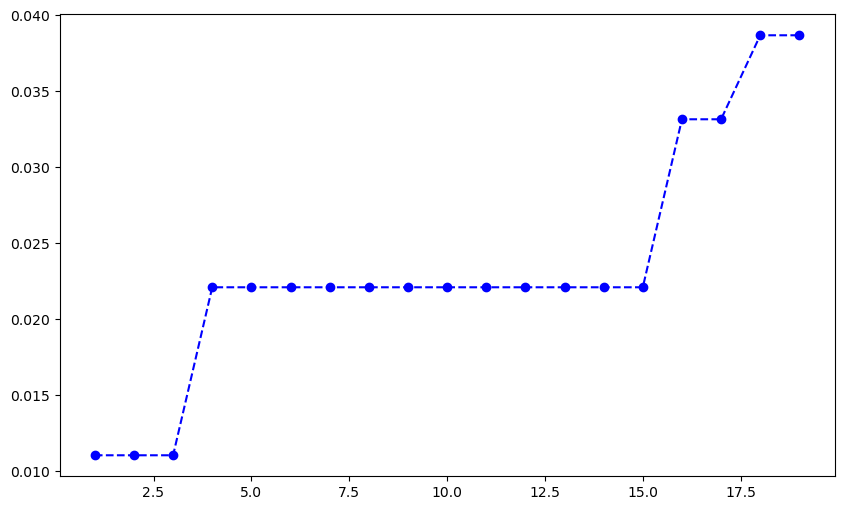

In [63]:
from sklearn.neighbors import KNeighborsClassifier


error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))

# %%
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle='--',marker='o')

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)


In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_predict = model.predict(X_test)

In [6]:
#Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,y_predict))
print(confusion_matrix(Y_test,y_predict))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       130
           1       1.00      0.87      0.93        23
           2       0.97      1.00      0.98        28
           3       0.00      0.00      0.00         0

    accuracy                           0.98       181
   macro avg       0.74      0.72      0.73       181
weighted avg       0.99      0.98      0.98       181

[[129   0   1   0]
 [  1  20   0   2]
 [  0   0  28   0]
 [  0   0   0   0]]


d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Columns: 6306 entries, packetId to dmp.i2w.io.1
dtypes: int64(6305), object(1)
memory usage: 86.9+ MB


In [ ]:
cell_df.columns
#  = cell_df[:]
feature_df= cell_df.drop(cell_df.columns[:2], axis=1)

#let say it have 100 rows, i am just, picked 9 colums out of it  
#thus 9 colums our of 11

# independent variable
X = np.asarray(feature_df)
#dependent variable
Y=np.asarray(cell_df['pii_exist'])



from sklearn.model_selection import train_test_split
SVM1X_train,SVM2X_train,SVM1Y_train,SVM2Y_train = train_test_split(X,Y,test_size = 0.5,random_state=4)




from sklearn.svm import SVC

# Assuming you have two trained SVM models svm1 and svm2
svm1 = SVC(kernel='linear', C=1.0)
svm2 = SVC(kernel='linear', C=1.0)

svm1.fit(SVM1X_train,SVM1Y_train)
svm2.fit(SVM2X_train,SVM2Y_train)

coefficients_svm1 = svm1.coef_
intercept_svm1 = svm1.intercept_

coefficients_svm2 = svm2.coef_
intercept_svm2 = svm2.intercept_


print('coeff',coefficients_svm1,coefficients_svm2)
print('intercept',intercept_svm1,intercept_svm2)
# Train svm1 and svm2 on your data...

# Get the coefficients and intercepts of each SVM


# Average the coefficients and intercepts
average_coefficients = (coefficients_svm1 + coefficients_svm2) / 2
average_intercept = (intercept_svm1 + intercept_svm2) / 2

# Create a new SVM model with the averaged coefficients and intercept
joined_svm = SVC(kernel='linear', C=1.0, degree=3, gamma='auto', 
                coef0=average_coefficients)
# Create the combined SVM model
joined_svm.intercept_ = average_intercept

# Now you can use the joined_svm model for prediction

joined_svm_predict = classifier.predict(SVM1X_train)



from sklearn.metrics import classification_report
print(classification_report(SVM1Y_train,joined_svm_predict))










coeff [[ 2.18575158e-16  0.00000000e+00 -7.04397431e-03 ...  0.00000000e+00
   0.00000000e+00  5.41942213e-02]] [[-4.51028104e-17 -2.20666373e-03 -9.81257429e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
intercept [-0.80456147] [-0.85868332]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       658
           3       1.00      1.00      1.00       245

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In [ ]:
cell_df.columns
#  = cell_df[:]
feature_df= cell_df.drop(cell_df.columns[:2], axis=1)

#let say it have 100 rows, i am just, picked 9 colums out of it  
#thus 9 colums our of 11

# independent variable
X = np.asarray(feature_df)
#dependent variable
Y=np.asarray(cell_df['pii_exist'])



from sklearn.model_selection import train_test_split

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# # Split the remaining data into validation and test sets
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

SVM1X_train,X_temp,SVM1Y_train,Y_temp = train_test_split(X,Y,test_size = 0.6,random_state=4)
SVM2X_train,joinx_train,SVM2Y_train,joiny_train = train_test_split(X_temp,Y_temp,test_size = 0.5,random_state=4)




from sklearn.svm import SVC

# Assuming you have two trained SVM models svm1 and svm2
svm1 = SVC(kernel='linear', C=1.0)
svm2 = SVC(kernel='linear', C=1.0)

svm1.fit(SVM1X_train,SVM1Y_train)
svm2.fit(SVM2X_train,SVM2Y_train)

coefficients_svm1 = svm1.coef_
intercept_svm1 = svm1.intercept_

coefficients_svm2 = svm2.coef_
intercept_svm2 = svm2.intercept_




# Train svm1 and svm2 on your data...

# Get the coefficients and intercepts of each SVM


# Average the coefficients and intercepts
average_coefficients = (coefficients_svm1 + coefficients_svm2) / 2
average_intercept = (intercept_svm1 + intercept_svm2) / 2

# Create a new SVM model with the averaged coefficients and intercept
joined_svm = SVC(kernel='linear', C=1.0, degree=3, gamma='auto', 
                coef0=average_coefficients)

# Now you can use the joined_svm model for prediction

joined_svm_predict = classifier.predict(joinx_train)



from sklearn.metrics import classification_report
print(classification_report(joiny_train,joined_svm_predict))










              precision    recall  f1-score   support

           1       1.00      1.00      1.00       382
           3       1.00      1.00      1.00       161

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543



In [ ]:
df1 = pd.read_csv('output/output1.csv')
df2 = pd.read_csv('output/output.csv')

df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Columns: 1034 entries, packetId to "161"
dtypes: int64(1033), object(1)
memory usage: 14.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Columns: 6306 entries, packetId to dmp.i2w.io.1
dtypes: int64(6305), object(1)
memory usage: 86.9+ MB
